<a href="https://colab.research.google.com/github/B-hub-hue/Python.exam_polymer/blob/main/Python_exam_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

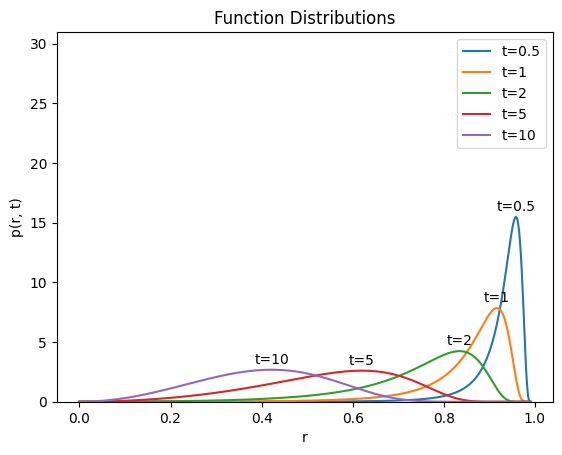

In [ ]:
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
def P(r= np.array([0.0, 0.2, 0.4, 0.6, 0.8, 0.99]), t=(0.5, 1, 2, 5, 10)):
# np.random.randint(0.1, 10, size=10)
  t = np.array(t)
  result=[]

  for time_val in t:
   a = 0.75*time_val
   C = 1/((np.pi**3/2)*(np.exp(-a))*(a**(-3/2))*((1+3*a**-1)+((15/4)*(a**-2))))
   prob = 4*C*np.pi*(r**2/(1-r**2)**(9/2))*np.exp((-3*time_val/4)*(1/(1-r**2)))
   result.append(prob)
   prob /= np.trapz(prob, r)  # Normalize using trapezoidal integration


  return np.array(result)

r= np.linspace(0, 0.99, 1000)#np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
t_values = (0.5, 1, 2, 5, 10)
result = P(r, t_values)

for i in range(result.shape[0]):
    plt.plot(r, result[i])
    # Annotate t value above each curve at the peak
    peak_x = r[np.argmax(result[i])]  # Find the x position of the peak
    peak_y = np.max(result[i])        # Find the y position of the peak
    plt.text(peak_x, peak_y + 0.5, f't={t_values[i]}', ha='center', fontsize=10)


#plt.plot(result)
plt.ylim(0, 2 *np.max(result))
plt.xlabel('r')
plt.ylabel('p(r, t)')
plt.title('Function Distributions')
plt.legend(['t=0.5', 't=1', 't=2', 't=5', 't=10'])
plt.show()

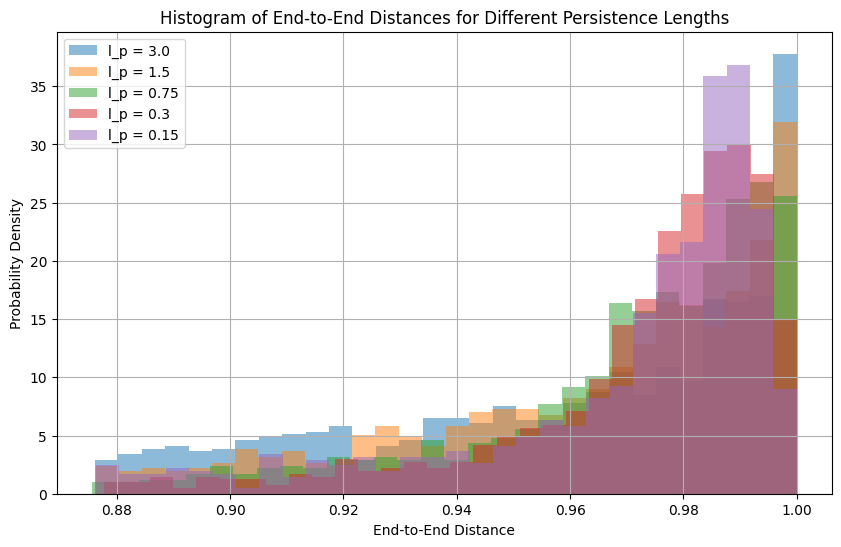

End-to-End Distance: 0.9750405443264717


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function for P(theta)
def P_theta(theta, delta_theta):
    return theta * np.exp(-theta * (theta / delta_theta)**2)

# Parameters
N = 100  # Number of segments
L = 1.0  # Length of each segment
delta_theta = 0.101  # Example value for delta_theta

# Generate theta samples with persistence length
def generate_theta_samples_with_persistence(num_samples, delta_theta, persistence_length):
    theta_samples = np.zeros(num_samples)
    theta_samples[0] = np.random.uniform(0, 5 * delta_theta)  # First angle

    for i in range(1, num_samples):
        theta_prev = theta_samples[i - 1]
        theta_next = np.random.normal(theta_prev, persistence_length)  # Normal distribution centered around previous angle
        theta_next = np.clip(theta_next, 0, 5 * delta_theta)  # Ensure it's within bounds
        prob = P_theta(theta_next, delta_theta)
        if np.random.rand() < prob: # This conditional statement checks if a randomly generated number (from a uniform distribution between 0 and 1) is less than prob.
                                      # If it is, theta_next is accepted and stored in the theta_samples array.
                                     #If not, the previous angle (theta_prev) is retained instead. This is the essence of the acceptance-rejection sampling method.

            theta_samples[i] = theta_next
        else:
            theta_samples[i] = theta_prev
    return theta_samples

# Generate uniformly distributed phi
def generate_phi_samples(num_samples):
    return np.random.uniform(0, 2 * np.pi, num_samples)

# Persistence lengths to test
persistence_lengths = np.array([3.00, 1.5, 0.75, 0.30, 0.15])

# Store end-to-end distances for different persistence lengths
end_to_end_distances = []
def calculate_end_to_end_distance(N, L, thetas, phis):
    R_x = np.sum(L * np.sin(thetas) * np.cos(phis))
    R_y = np.sum(L * np.sin(thetas) * np.sin(phis))
    R_z = np.sum(L * np.cos(thetas))
    R = np.sqrt(R_x**2 + R_y**2 + R_z**2)/100

    return R

end_to_end_distance = calculate_end_to_end_distance(N, L, thetas, phis)

# Run simulations for each persistence length
for persistence_length in persistence_lengths:
    distances = []
    for _ in range(1000):  # Number of simulations per persistence length
        thetas = generate_theta_samples_with_persistence(N, delta_theta, persistence_length)
        phis = generate_phi_samples(N)
        distance = calculate_end_to_end_distance(N, L, thetas, phis)
        distances.append(distance)
    end_to_end_distances.append(distances)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, persistence_length in enumerate(persistence_lengths):
    bins = np.linspace(0, 1, 30)
    plt.hist(end_to_end_distances[i], bins=30, density=True, alpha=0.5, label=f'l_p = {persistence_length}')


plt.xlabel('End-to-End Distance')
plt.ylabel('Probability Density')
plt.title('Histogram of End-to-End Distances for Different Persistence Lengths')
plt.legend()
plt.grid()
plt.show()
print(f"End-to-End Distance: {end_to_end_distance}")

